In [1]:
import pandas as pd
import os
import json
import glob
import nltk
import sklearn
import numpy as np
import re

In [2]:
metadata_csv_path = os.path.join(os.path.abspath(os.path.curdir), "docs\\CORD-19-research-challenge\\metadata.csv")

In [3]:
metaCSV = pd.read_csv(metadata_csv_path)
metaCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51078 entries, 0 to 51077
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cord_uid                     51078 non-null  object 
 1   sha                          38022 non-null  object 
 2   source_x                     51078 non-null  object 
 3   title                        50920 non-null  object 
 4   doi                          47741 non-null  object 
 5   pmcid                        41082 non-null  object 
 6   pubmed_id                    37861 non-null  float64
 7   license                      51078 non-null  object 
 8   abstract                     42352 non-null  object 
 9   publish_time                 51070 non-null  object 
 10  authors                      48891 non-null  object 
 11  journal                      46368 non-null  object 
 12  Microsoft Academic Paper ID  964 non-null    float64
 13  WHO #Covidence  

In [4]:
metaCSV = metaCSV[['cord_uid', 'sha', 'pmcid', 'title', 'abstract', 'authors', 'journal']]
#metaCSV.head()

In [5]:
#Only keep the items with titles, abstracts, and sha values.
metaCSV.dropna(inplace=True, subset = {'title', 'abstract', 'sha'})


In [6]:
filename = metaCSV.iloc[3,1] + ".json"
filepath = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
os.path.abspath(filepath)

'C:\\Users\\Nic\\PycharmProjects\\cs5293sp20-project2\\docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\5b68a553a7cbbea13472721cd1ad617d42b40c26.json'

In [7]:
#This block will create a boolean filter to remove all the rows that are not in the comm_use_subset
#But we will use the more comprehensive dataset instead.

#i = 0
#in_subset = []
#for items in metaCSV['sha']:
#    filename = metaCSV.iloc[i,1] + ".json"
#    filepath = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
#    os.path.abspath(filepath)
#    in_subset.append(os.path.exists(os.path.abspath(filepath)))
#    i = i + 1
#pd.Series(in_subset)
#in_subset
#meta_CSV = metaCSV[in_subset]

In [8]:
loop_count = 0
in_comm_use = []
in_noncomm_use = []
in_custom_license = []
in_biorxiv_medrxiv = []

in_any_subset = []

for items in metaCSV['sha']:
    filename = metaCSV.iloc[loop_count,1] + ".json"
    filepath1 = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
    filepath2 = "docs\\CORD-19-research-challenge\\noncomm_use_subset\\noncomm_use_subset\\pdf_json\\" + filename
    filepath3 = "docs\\CORD-19-research-challenge\\custom_license\\custom_license\\pdf_json\\" + filename
    filepath4 = "docs\\CORD-19-research-challenge\\biorxiv_medrxiv\\biorxiv_medrxiv\\pdf_json\\" + filename

    in_comm_use.append(os.path.exists(os.path.abspath(filepath1)))
    in_noncomm_use.append(os.path.exists(os.path.abspath(filepath2)))
    in_custom_license.append(os.path.exists(os.path.abspath(filepath3)))
    in_biorxiv_medrxiv.append(os.path.exists(os.path.abspath(filepath4)))
    
    
    if in_comm_use[loop_count] == True or in_noncomm_use[loop_count] == True or in_custom_license[loop_count] == True or in_biorxiv_medrxiv[loop_count] == True:
        in_any_subset.append(True)
    else:
        in_any_subset.append(False)
    loop_count = loop_count + 1
#pd.Series(in_any_subset)
#in_any_subset

In [9]:
meta_CSV = metaCSV[in_any_subset]
meta_CSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31646 entries, 0 to 51076
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cord_uid  31646 non-null  object
 1   sha       31646 non-null  object
 2   pmcid     26925 non-null  object
 3   title     31646 non-null  object
 4   abstract  31646 non-null  object
 5   authors   31487 non-null  object
 6   journal   29928 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


In [10]:
#There are 9,524 items in the comm_use_subset pdf list
#There are 9,148 items in the comm_use_subset pmc list
#There are 2,490 items in the noncomm_use_subset pdf list
#There are 2,217 items in the noncomm_use_subset pmc list
#There are 26,505 items in the custom_license pdf list
#There are 7,802 items in the custom_license pmc list
#There are 1,625 items in the biorxiv_medrxiv pdf list

#That's a total of 40,144 pdf papers (with sha names)
#Using the sha code, we found 31,646 papers.
#So, 8,498 items were not found with the sha code, that's fine.

#We can now take a random sample of these 31,000 papers to generate a much smaller list of 5000.

meta_sample = meta_CSV.sample(n=5000, random_state = 666) #because it's funny
meta_sample.head()


,cord_uid,sha,pmcid,title,abstract,authors,journal
13761,3zturry3,dd63c8a6ff3ae72819472ca9eef5dfb0f13afb5e,PMC7089353,High-level expression of a human β-site APP cl...,Plastid transformation has to date been applie...,"Youm, Jung Won; Jeon, Jae Heung; Kim, Hee; Min...",Transgenic Res
12425,yi2l5bcu,7e4c7d38872c37923d5ba6e8da2c6b01b72f176d,PMC7080100,Review of plasmonic fiber optic biochemical se...,This paper presents a brief overview of the te...,"Caucheteur, Christophe; Guo, Tuan; Albert, Jac...",Anal Bioanal Chem
5169,pd9lt4n2,dd969a7721176db21314930b62e62a37e902dae5,PMC4453572,Heparan Sulfate-Dependent Enhancement of Henip...,"Nipah virus and Hendra virus are emerging, hig...","Mathieu, Cyrille; Dhondt, Kévin P.; Châlons, M...",mBio
5971,r46d5kdu,33310fc6d99fa6bbf3aa6160168f3acba6a736d7,PMC4728157,Roles of the hemagglutinin of influenza A viru...,Seasonal influenza epidemics and influenza pan...,"Jiang, Shibo; Li, Runming; Du, Lanying; Liu, S...",Protein & Cell
50818,e93nu56p,adec4c54ca0073999de9e63c5806585d5ac2c358,PMC7116949,The ventilation of multiple-bed hospital wards...,Abstract Hospital and healthcare facilities ha...,"Yau, Y.H.; Chandrasegaran, D.; Badarudin, A.",Building and Environment


In [11]:
filepaths = []

for i in range (0,len(meta_sample)):
    sha = meta_sample.iloc[i,1] #meta_sample.iloc[i,1]
    filename = sha + ".json"
    
    filepath1 = "docs\\CORD-19-research-challenge\\comm_use_subset\\comm_use_subset\\pdf_json\\" + filename
    filepath2 = "docs\\CORD-19-research-challenge\\noncomm_use_subset\\noncomm_use_subset\\pdf_json\\" + filename
    filepath3 = "docs\\CORD-19-research-challenge\\custom_license\\custom_license\\pdf_json\\" + filename
    filepath4 = "docs\\CORD-19-research-challenge\\biorxiv_medrxiv\\biorxiv_medrxiv\\pdf_json\\" + filename
    
    if os.path.exists(os.path.abspath(filepath1)):
        filepaths.append(filepath1)
    elif os.path.exists(os.path.abspath(filepath2)):
        filepaths.append(filepath2)
    elif os.path.exists(os.path.abspath(filepath3)):
        filepaths.append(filepath3)
    elif os.path.exists(os.path.abspath(filepath4)):
        filepaths.append(filepath4)
    
    
#filepaths[:2]
    
    #globstring = os.path.abspath(os.curdir) + '\\docs\\CORD-19-research-challenge\\**\\pdf_json\\' + filename
    #filepath = glob.glob(globstring, recursive = True)
    #filepaths.append(filepath)

In [12]:
#Excellent. Now we need to read in the .json files in a way that allows us to access the text, so we can tokenize it.


full_text_list = []

for i in range (0,len(filepaths)):

    with open(filepaths[i], 'r') as file:
        myjson = json.load(file)
        file.close()


    full_text = ""
    for x in range(0,len(myjson['body_text'])):
        if x == len(myjson['body_text'])-1:
            full_text = full_text + myjson['body_text'][x]["text"]
        else:      
            full_text = full_text + myjson['body_text'][x]["text"] + " "
    
    #Just some helpful progress text since this block takes a few seconds.
    if i % 500 == 0:
        print("text " + str(i) + " processed")
    if i == len(filepaths) - 1:
        print("text " + str(i) + " processed")

    full_text_list.append(full_text)

#full_text_list.head()
#I will actually append this full text to a monster list.





#The goal is to create a dataframe in the end, which we can work with more easily.
#My vision is something like:
#    sha/paper_id     title              abstract_text (list of tokens)          body_text (list of tokens)          TF-IDF vector
#    1200128asfd34    High-level...      'We found that ...'    '[Introduction, Planarians, posess, ability, ...]     [0.5,0.2,0.3,...]



text 0 processed
text 500 processed
text 1000 processed
text 1500 processed
text 2000 processed
text 2500 processed
text 3000 processed
text 3500 processed
text 4000 processed
text 4500 processed
text 4999 processed


In [13]:
full_abstract_list = []

for i in range (0,len(filepaths)):

    with open(filepaths[i], 'r') as file:
        myjson = json.load(file)
        file.close()


    full_abstract_text = ""
    for x in range(0,len(myjson['abstract'])):
        if x == len(myjson['abstract'])-1:
            full_abstract_text = full_abstract_text + myjson['abstract'][x]["text"]
        else:      
            full_abstract_text = full_abstract_text + myjson['abstract'][x]["text"] + " "
    
    if i % 500 == 0:
        print("abstract " + str(i) + " processed")
    elif i == len(filepaths) - 1:
        print("abstract " + str(i) + " processed")
        
    full_abstract_list.append(full_abstract_text)

abstract 0 processed
abstract 500 processed
abstract 1000 processed
abstract 1500 processed
abstract 2000 processed
abstract 2500 processed
abstract 3000 processed
abstract 3500 processed
abstract 4000 processed
abstract 4500 processed
abstract 4999 processed


In [14]:
#Here is where we can actually start doing some Natural Language Processing.
#Step 1 is always to clean up our text. It is a still kinda a hot mess, lots of extra symbols, tons of words which cloud the
#meaning of the text (stopwords, "the", "we", "a", etc. stuff like that)


#nltk.download('stopwords') need this for the first run.
stop_words = nltk.corpus.stopwords.words('english')
extraStopWords = ['et','al', 'al.', '(', ')', ',', '.', ':', ';', '%', '#', '@', '&', '!', '?', '[', ']']
stop_words.extend(extraStopWords)

clean_text = []

def normalizeDoc(txt):
    for i in range(0,len(txt)):
        myText = txt[i]
        myText = re.sub(r'[^a-zA-Z0-9\s]', '', myText, re.I|re.A)
        myText = myText.lower()
        myText = myText.strip()
        tokens = nltk.word_tokenize(myText)
        clean_tokens = [t for t in tokens if t not in stop_words]
        clean_text.append(' '.join(clean_tokens))
        if i % 100 == 0:
            print("text " + str(i) + " tokens cleaned ("+ str(i/len(txt)*100) + "% complete)")
        elif i == len(txt) - 1:
            print("text " + str(i) + " tokens cleaned (100% complete)")
            
normalizeDoc(full_text_list)
len(clean_text)


text 0 tokens cleaned (0.0% complete)
text 100 tokens cleaned (2.0% complete)
text 200 tokens cleaned (4.0% complete)
text 300 tokens cleaned (6.0% complete)
text 400 tokens cleaned (8.0% complete)
text 500 tokens cleaned (10.0% complete)
text 600 tokens cleaned (12.0% complete)
text 700 tokens cleaned (14.000000000000002% complete)
text 800 tokens cleaned (16.0% complete)
text 900 tokens cleaned (18.0% complete)
text 1000 tokens cleaned (20.0% complete)
text 1100 tokens cleaned (22.0% complete)
text 1200 tokens cleaned (24.0% complete)
text 1300 tokens cleaned (26.0% complete)
text 1400 tokens cleaned (28.000000000000004% complete)
text 1500 tokens cleaned (30.0% complete)
text 1600 tokens cleaned (32.0% complete)
text 1700 tokens cleaned (34.0% complete)
text 1800 tokens cleaned (36.0% complete)
text 1900 tokens cleaned (38.0% complete)
text 2000 tokens cleaned (40.0% complete)
text 2100 tokens cleaned (42.0% complete)
text 2200 tokens cleaned (44.0% complete)
text 2300 tokens cleane

5000

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1,2), min_df=2)

#This is our vectorized data

tfidf_matrix = tf.fit_transform(clean_text)
tfidf_matrix.shape

(5000, 1383050)

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.info()
doc_sim_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 5000 entries, 0 to 4999
dtypes: float64(5000)
memory usage: 190.7 MB


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.010976,0.017728,0.023722,0.009003,0.009332,0.025223,0.017180,0.011410,0.040804,...,0.005792,0.008024,0.018748,0.006593,0.041930,0.025644,0.001362,0.014431,0.022806,0.048280
1,0.010976,1.000000,0.054540,0.019048,0.029396,0.019946,0.034204,0.015320,0.017480,0.015131,...,0.017184,0.021644,0.016753,0.017944,0.017709,0.014168,0.000537,0.007307,0.014906,0.022200
2,0.017728,0.054540,1.000000,0.033167,0.015710,0.017117,0.088097,0.031679,0.030044,0.024887,...,0.006643,0.008376,0.075649,0.011711,0.040690,0.027136,0.001712,0.026034,0.051617,0.047674
3,0.023722,0.019048,0.033167,1.000000,0.018665,0.012091,0.055222,0.021003,0.085236,0.037893,...,0.009376,0.024560,0.043558,0.024977,0.046798,0.024678,0.008052,0.015112,0.023809,0.056344
4,0.009003,0.029396,0.015710,0.018665,1.000000,0.014070,0.019293,0.012057,0.056470,0.017459,...,0.040245,0.019397,0.016172,0.021908,0.014335,0.013437,0.000710,0.012257,0.016319,0.020634


In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity = 50, verbose=1)

X_embedded = tsne.fit_transform(tfidf_matrix)
X_embedded.shape


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.078s...
[t-SNE] Computed neighbors for 5000 samples in 20.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.284458
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.815742
[t-SNE] KL divergence after 1000 iterations: 1.868135


(5000, 2)

<function matplotlib.pyplot.show(*args, **kw)>

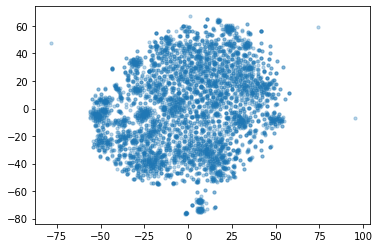

In [74]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 0.3, s=10)
plt.show

#palette = sns.color_palette("bright", 2)
#sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=X_embedded[:,1], legend='full')


In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=15, max_iter=10000, n_init=50, random_state=42)
km.fit(X_embedded)
km.labels_


array([ 4, 13,  8, ...,  4,  2,  7])

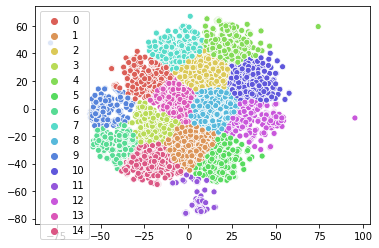

In [92]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=km.labels_, 
                palette = sns.color_palette("hls", 15))


In [88]:
#We will attempt to create silhouette scores to judge how good our clustering was.

from sklearn.metrics import silhouette_samples, silhouette_score

# This code was modified from Sklearn's website:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_n_clusters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_embedded)
    silhouette_avg = silhouette_score(X_embedded, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_embedded, cluster_labels)


#Conclusion, all cluster numbers are relatively similar, 0.37 or 0.38 are not particularily impressive silhouette scores.
# (If you have pretty distinct clusters, you will get numbers closer to 0.7+)
# 45 clusters technically has the highest score, but marginally.
# We go with 15 clusters because it is a manageable amount, and has a >0.38 score.




For n_clusters = 5 The average silhouette_score is : 0.36539188
For n_clusters = 10 The average silhouette_score is : 0.37752217
For n_clusters = 15 The average silhouette_score is : 0.38210693
For n_clusters = 20 The average silhouette_score is : 0.3785917
For n_clusters = 25 The average silhouette_score is : 0.37619337
For n_clusters = 30 The average silhouette_score is : 0.37771678
For n_clusters = 35 The average silhouette_score is : 0.3829579
For n_clusters = 40 The average silhouette_score is : 0.37780216
For n_clusters = 45 The average silhouette_score is : 0.38303593
For n_clusters = 50 The average silhouette_score is : 0.37745953


In [94]:
meta_sample['k_cluster'] = km.labels_




paper_clusters = (meta_sample[['title', 'abstract', 'k_cluster']]
                  .sort_values(by=['k_cluster'],ascending=False))

paper_clusters



,title,abstract,k_cluster
8209,Use of Obstetric Practice Web Sites to Distrib...,OBJECTIVE: To describe the current use of obst...,14
14519,Pandemic preparedness and forecast,"Geographic mapping of pathogen emergence risk,...",14
23145,"Ambient temperature, birth rate, and birth out...","The effects from rising temperatures, a sympto...",14
366,World wide web resources on control of nosocom...,Nosocomial infections are a major worldwide ca...,14
4887,Evaluation and mechanism for outcomes explorat...,BACKGROUND: The Chinese government has increas...,14
...,...,...,...
13601,Identification of one peptide which inhibited ...,Purified avian infectious bronchitis virus (IB...,0
1831,Investigation of a Potential Zoonotic Transmis...,Bats are increasingly being recognized as impo...,0
2048,First Dating of a Recombination Event in Mamma...,The mammalian tick-borne flavivirus group (MTB...,0
9037,Isolation and characterization of an astroviru...,Astroviruses are recognized as a leading cause...,0


In [121]:
feature_name = tf.get_feature_names()
topn_features = 20

ordered_centroids = km.cluster_centers_
ordered_centroids.argsort()[:, ::-1]

#for each cluster, I want to print out the top features (words)

#for cluster_num in range(15):
#    key_features = [feature_name[index]
#                for index in ordered_centroids[cluster_num, :topn_features]]
#    papers = paper_clusters[paper_clusters['k_cluster'] == cluster_num] ['title'].values.tolist()
#    print('CLUSTER #' +str(cluster_num+1))
#    print('Key Features:', key_features)

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]], dtype=int64)

In [125]:
import numpy
help(numpy.argsort)

Help on function argsort in module numpy:

argsort(a, axis=-1, kind=None, order=None)
    Returns the indices that would sort an array.
    
    Perform an indirect sort along the given axis using the algorithm specified
    by the `kind` keyword. It returns an array of indices of the same shape as
    `a` that index data along the given axis in sorted order.
    
    Parameters
    ----------
    a : array_like
        Array to sort.
    axis : int or None, optional
        Axis along which to sort.  The default is -1 (the last axis). If None,
        the flattened array is used.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort under the covers and, in general, the
        actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stab